In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nengo
import scipy
import pandas as pd
palette = sns.color_palette('tab10')
sns.set_palette(palette)
sns.set(context='paper', style='white', font="cmr10", font_scale=1.2)
plt.rcParams['axes.formatter.use_mathtext'] = True

## Optuna

In [29]:
human = pd.read_pickle("data/carrabin.pkl")
b_n = pd.read_pickle("data/B_n_carrabin_mar6_dynamics.pkl")
rl_n = pd.read_pickle("data/RL_n_carrabin_mar6_dynamics.pkl")
nef_rl_l0 = pd.read_pickle("data/NEF_RL_carrabin_mar6_dynamics.pkl")
nef_wm_l0 = pd.read_pickle("data/NEF_WM_carrabin_mar6_dynamics.pkl")
nef_rl_l1 = pd.read_pickle("data/NEF_RL_carrabin_mar10_dynamics.pkl")
nef_wm_l1 = pd.read_pickle("data/NEF_WM_carrabin_mar10_dynamics.pkl")
nef_rl_l0['type'] = "NEF_RL L=0"
nef_wm_l0['type'] = "NEF_WM L=0"
nef_rl_l1['type'] = "NEF_RL L=1"
nef_wm_l1['type'] = "NEF_WM L=1"
combined = pd.concat([human, b_n, rl_n, nef_rl_l0, nef_wm_l0, nef_rl_l1, nef_wm_l1], ignore_index=True)

# Scipy

In [2]:
human = pd.read_pickle("data/carrabin.pkl")
bayes_n = pd.read_pickle("data/bayes_n_carrabin_feb12_dynamics.pkl")
rln = pd.read_pickle("data/RL_n2_carrabin_feb12_dynamics.pkl")
nef_rl = pd.read_pickle("data/NEF_RL_carrabin_feb21_dynamics.pkl")
nef_wm = pd.read_pickle("data/NEF_WM_carrabin_feb21_dynamics.pkl")
dfs = [human, bayes_n, rln, nef_rl, nef_wm]
combined = pd.concat(dfs, ignore_index=True)

# Add data and plot

In [13]:
def add_excursion(combined):
    combined['excursion'] = None
    for sid in human['sid'].unique():
        print(sid)
        subdata = combined.query("sid==@sid")
        for i, row in subdata.iterrows():
            mt = row['type']
            sid = row['sid']
            qid = row['qid']
            response = row['response']
            avg_response = subdata.query("type==@mt & sid==@sid & qid==@qid")['response'].mean()
            combined.at[i, 'excursion'] = response - avg_response
    return combined

In [24]:
def plot_by_sids(combined):
    g = sns.FacetGrid(combined, col='sid', hue="type", sharey=False, sharex=False, legend_out=False) # sharex='row'
    g.map_dataframe(sns.kdeplot, x="excursion", palette=palette[:5], fill=True, common_norm=False)
    g.add_legend()
    for ax in g.axes.flat:
        ax.set_xlim(-0.4, 0.4)
    g.savefig("plots/excursion_distribution_vs_sid.jpg", dpi=100)
    plt.show()

In [15]:
def plot_by_stages(combined):
    g = sns.FacetGrid(combined, col="type", sharey=False, hue='stage', sharex=False, legend_out=False) # sharex='row'
    g.map_dataframe(sns.kdeplot, x="excursion", hue='stage', palette=palette[:5], fill=True, common_norm=False, hue_order=[1,2,3,4,5])
    g.add_legend()
    for ax in g.axes.flat:
        ax.set_xlim(-0.5, 0.5)
    g.savefig("plots/excursion_distribution_vs_stage.jpg", dpi=100)
    plt.show()

In [16]:
def plot_by_sids_and_stages(combined):
    g = sns.FacetGrid(combined, col="type", row="sid", sharey=False, sharex=False, hue='stage', legend_out=False) # sharex='row'
    g.map_dataframe(sns.kdeplot, x="excursion", hue='stage', palette=palette[:5], fill=True, common_norm=False, hue_order=[1,2,3,4,5])
    g.add_legend()
    g.savefig("plots/excursion_distribution_vs_sid_and_stage.jpg", dpi=100)
    plt.show()

In [30]:
combined = add_excursion(combined)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


/home/psipeter/observational-learning-social-networks/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
/home/psipeter/observational-learning-social-networks/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
/home/psipeter/observational-learning-social-networks/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
/home/psipeter/observational-learning-social-networks/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
/home/psipeter/observational-learning-social-networks/venv/lib/python3.11/site-packages/seaborn/axisgrid

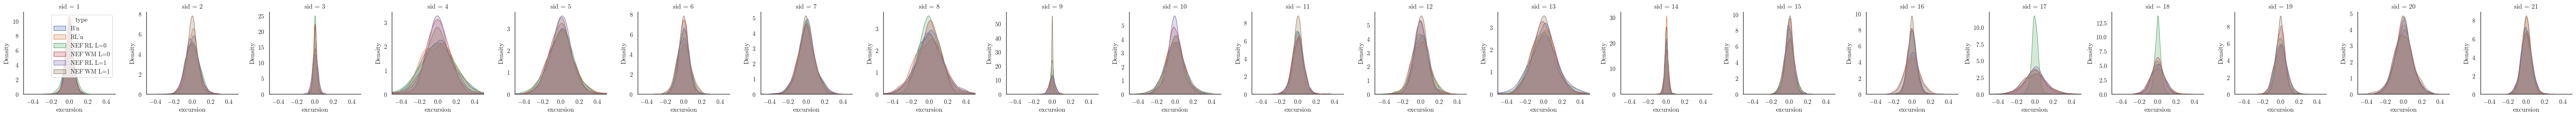

In [19]:
plot_by_sids(combined)

/home/psipeter/observational-learning-social-networks/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
/home/psipeter/observational-learning-social-networks/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
/home/psipeter/observational-learning-social-networks/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
/home/psipeter/observational-learning-social-networks/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
/home/psipeter/observational-learning-social-networks/venv/lib/python3.11/site-packages/seaborn/axisgrid

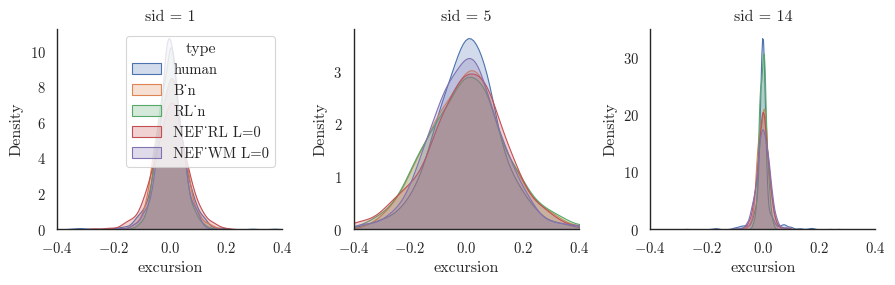

In [31]:
subsids = [1, 5, 14]
submodels = ['human', 'B_n', 'RL_n', 'NEF_RL L=0', 'NEF_WM L=0']
subdata = combined.query("sid==@subsids & type==@submodels")
plot_by_sids(subdata)

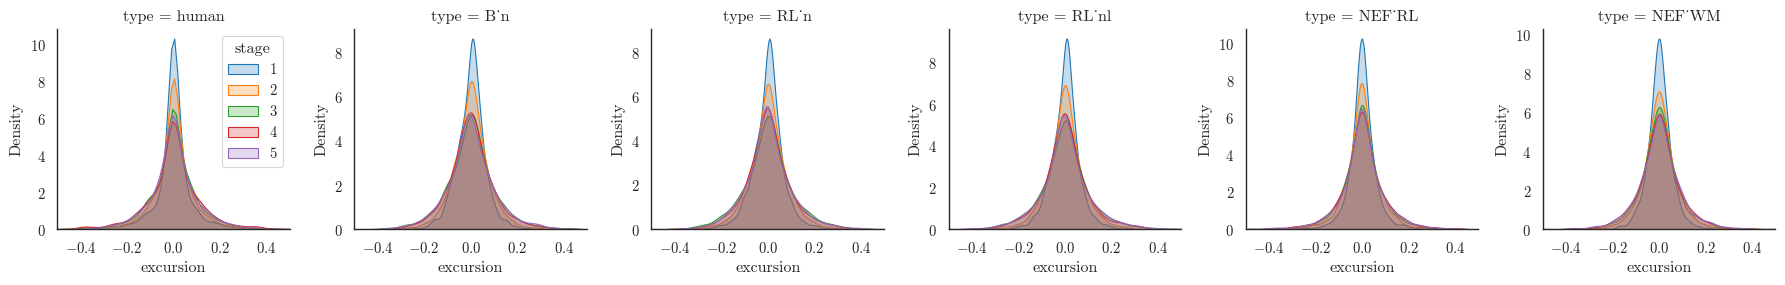

In [9]:
plot_by_stages(combined)

/home/psipeter/observational-learning-social-networks/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


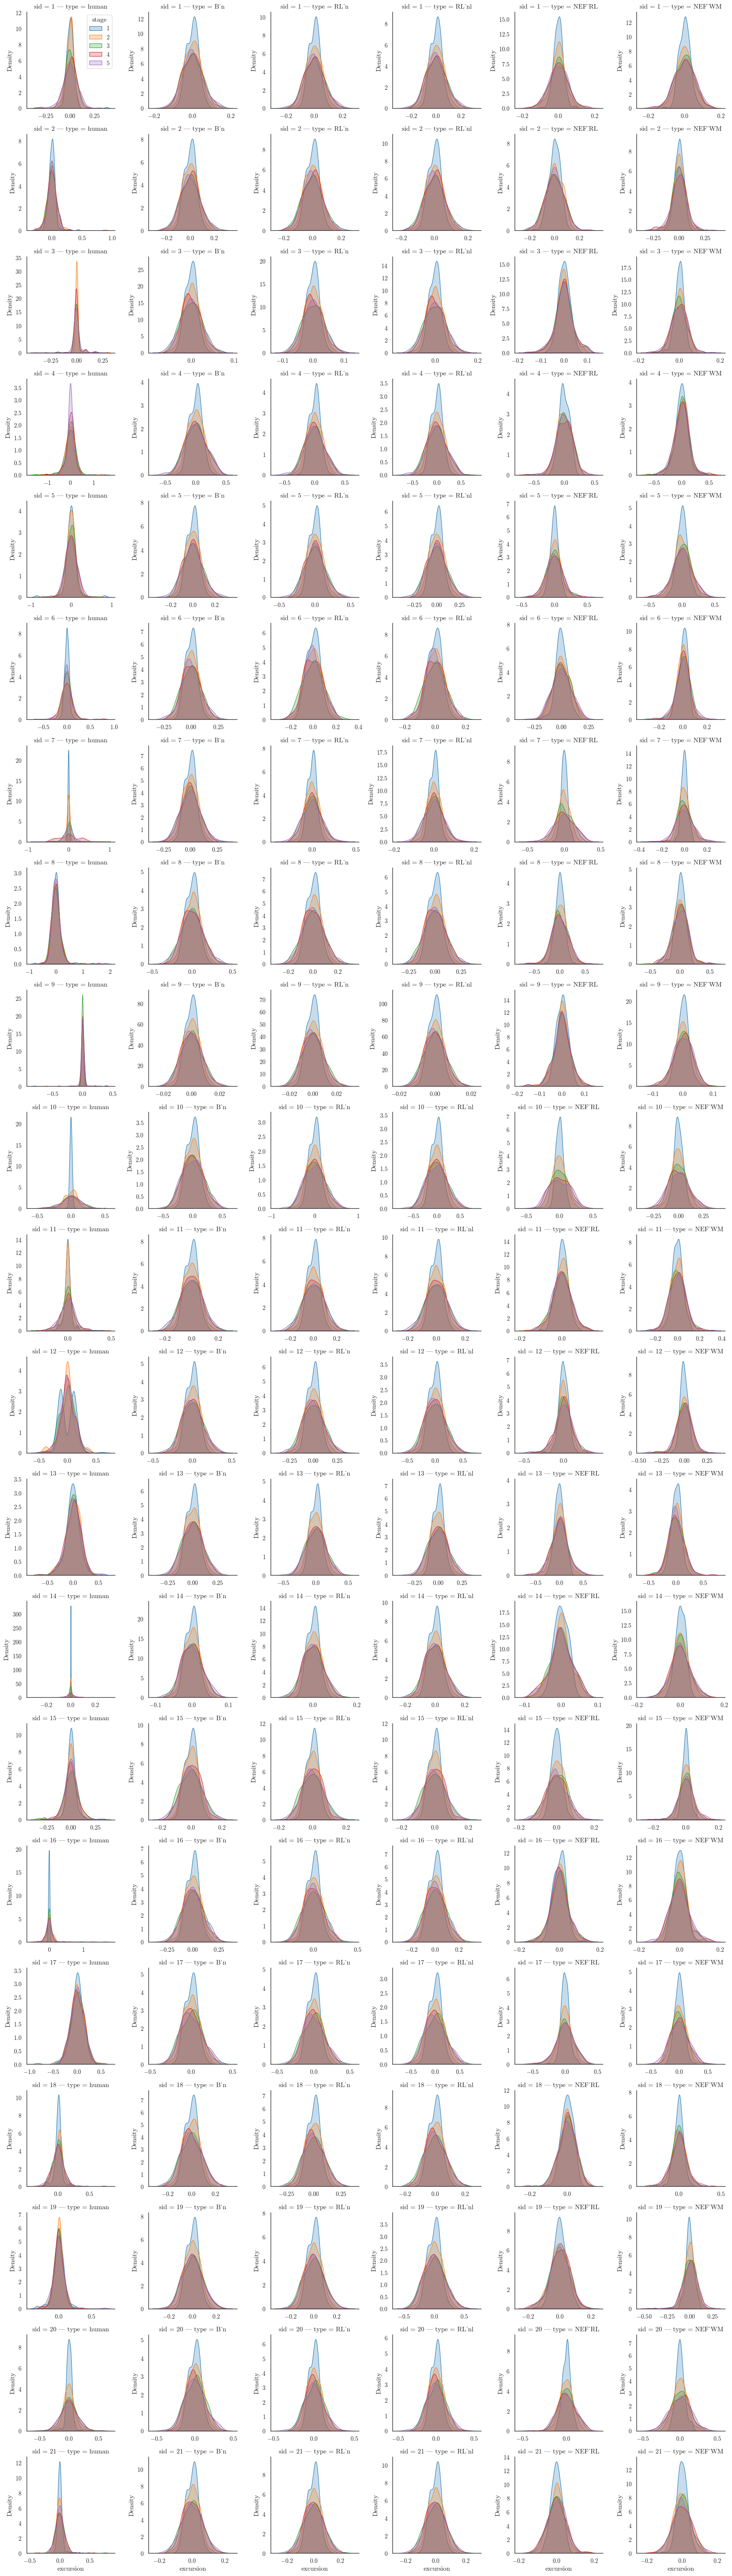

In [10]:
plot_by_sids_and_stages(combined)